In [2]:
import pandas as pd

csv_path = 'CICEVSE2024_Dataset/Power Consumption/EVSE-B-PowerCombined.csv'
data = pd.read_csv(csv_path)

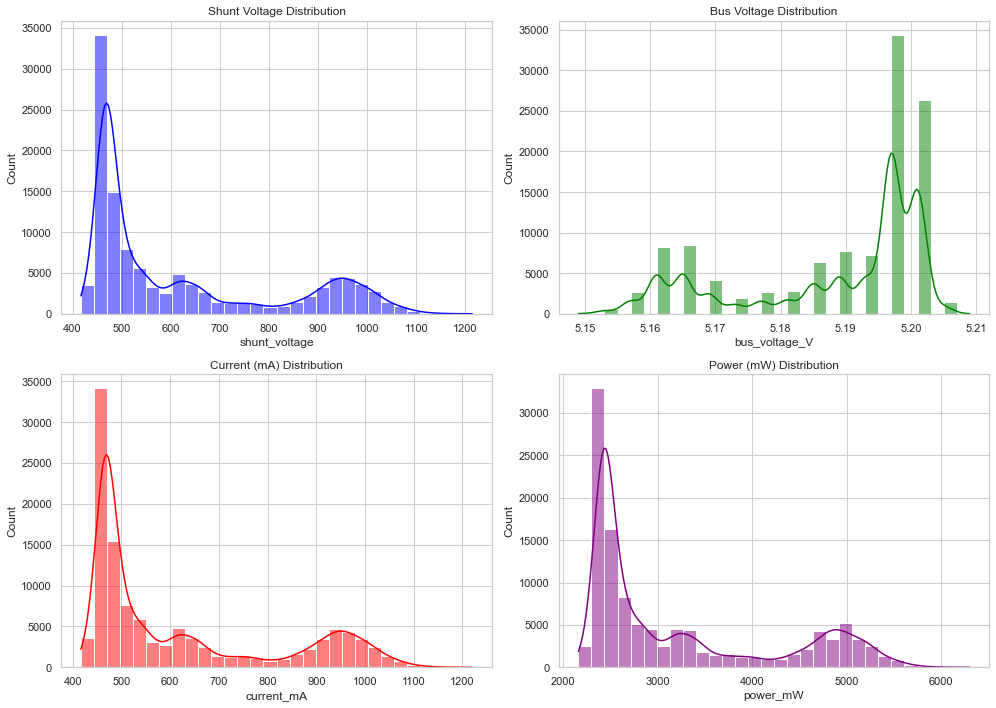

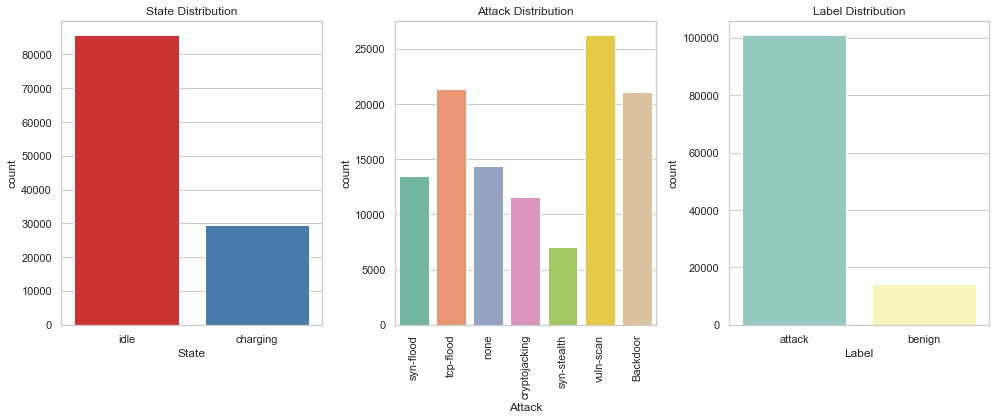

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['shunt_voltage'], kde=True, bins=30, color='blue')
plt.title('Shunt Voltage Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['bus_voltage_V'], kde=True, bins=30, color='green')
plt.title('Bus Voltage Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['current_mA'], kde=True, bins=30, color='red')
plt.title('Current (mA) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['power_mW'], kde=True, bins=30, color='purple')
plt.title('Power (mW) Distribution')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=data, x='State', hue='State', palette='Set1', legend=False)
plt.title('State Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Attack', hue='Attack', palette='Set2', legend=False)
plt.title('Attack Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(data=data, x='Label', hue='Label', palette='Set3', legend=False)
plt.title('Label Distribution')

plt.tight_layout()
plt.show()

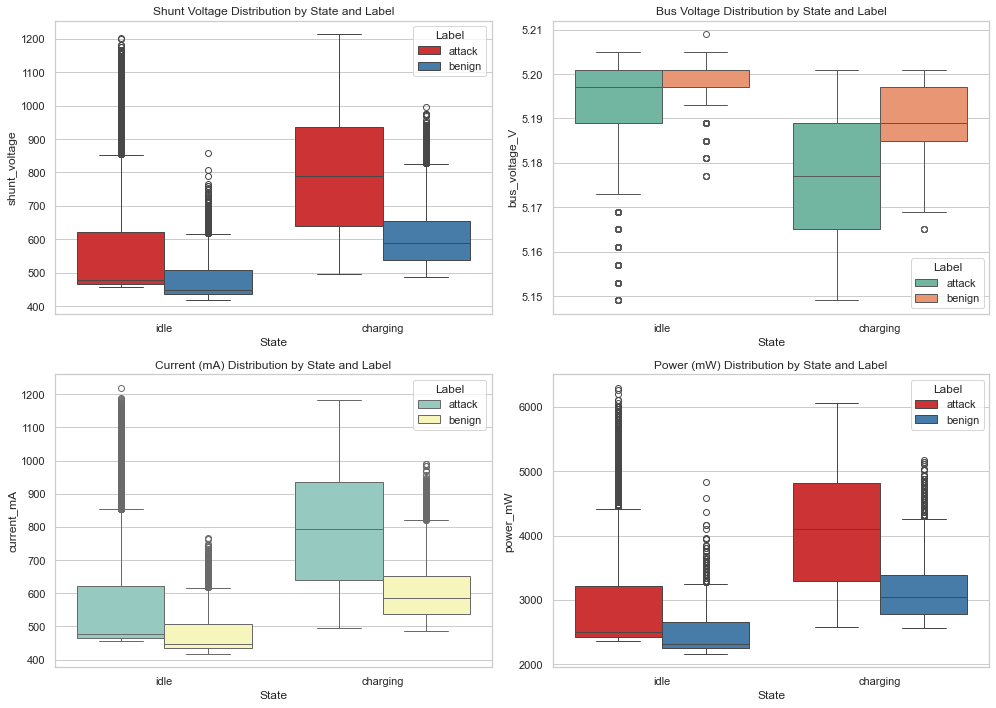

In [4]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='State', y='shunt_voltage', hue='Label', palette='Set1')
plt.title('Shunt Voltage Distribution by State and Label')

plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='State', y='bus_voltage_V', hue='Label', palette='Set2')
plt.title('Bus Voltage Distribution by State and Label')

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='State', y='current_mA', hue='Label', palette='Set3')
plt.title('Current (mA) Distribution by State and Label')

plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='State', y='power_mW', hue='Label', palette='Set1')
plt.title('Power (mW) Distribution by State and Label')

plt.tight_layout()
plt.show()

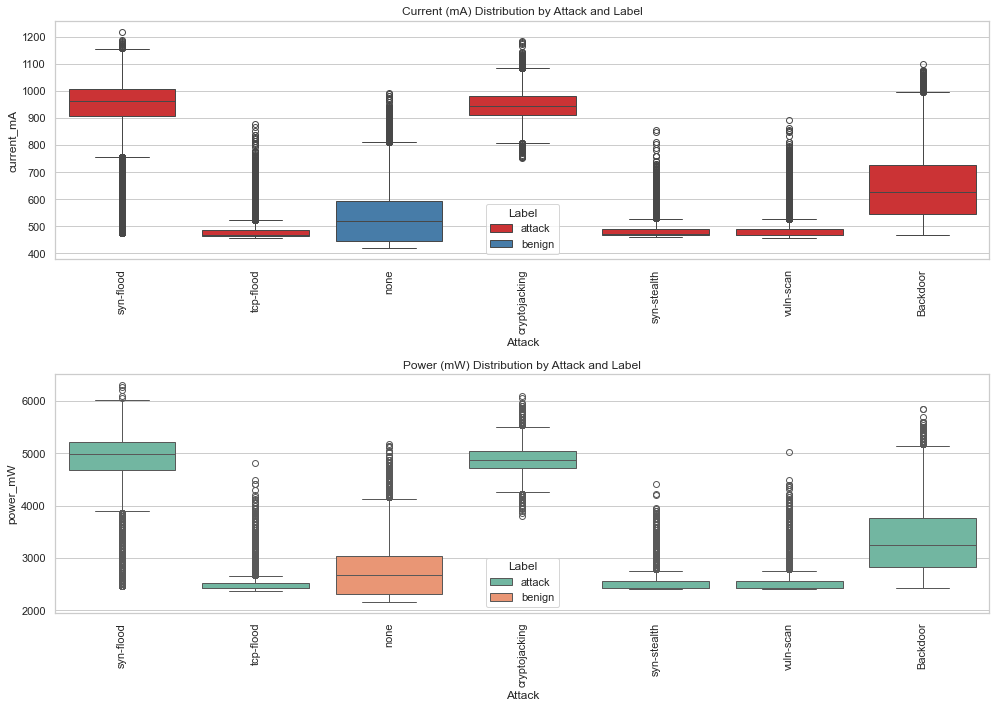

In [5]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.boxplot(data=data, x='Attack', y='current_mA', hue='Label', palette='Set1')
plt.title('Current (mA) Distribution by Attack and Label')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='Attack', y='power_mW', hue='Label', palette='Set2')
plt.title('Power (mW) Distribution by Attack and Label')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer

le_state = LabelEncoder()
data['State'] = le_state.fit_transform(data['State'])
le_interface = LabelEncoder()
data['interface'] = le_interface.fit_transform(data['interface'])

le_label = LabelEncoder()  
data['Label'] = le_label.fit_transform(data['Label'])  # 'attack' -> 1, 'benign' -> 0

features = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'State', 'interface']
y_binary = data['Label']

X_train, X_test, y_train_binary, y_test_binary = train_test_split(data[features], y_binary, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_binary)

y_pred_binary = rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_binary))

cross_val_scores = cross_val_score(rf, X_train, y_train_binary, cv=10, scoring='accuracy')
print(f"10-Fold Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20065
           1       1.00      1.00      1.00      2995

    accuracy                           1.00     23060
   macro avg       1.00      1.00      1.00     23060
weighted avg       1.00      1.00      1.00     23060

Confusion Matrix:
 [[20065     0]
 [    0  2995]]
10-Fold Cross-Validation Accuracy: 1.00


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


le_attack = LabelEncoder() 
data['Attack'] = le_attack.fit_transform(data['Attack'])  

features = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'State', 'interface']
y_multi = data['Attack']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(data[features], y_multi, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train_multi, y_train_multi)

y_pred_multi = rf.predict(X_test_multi)

y_test_multi_str = le_attack.inverse_transform(y_test_multi)
y_pred_multi_str = le_attack.inverse_transform(y_pred_multi)

attack_class_names = le_attack.classes_.astype(str) 

print("Classification Report (Multi-Class):\n", classification_report(y_test_multi_str, y_pred_multi_str, target_names=attack_class_names, zero_division=0))
print("Confusion Matrix (Multi-Class):\n", confusion_matrix(y_test_multi_str, y_pred_multi_str))

accuracy_multi = accuracy_score(y_test_multi_str, y_pred_multi_str)
print(f"Multi-Class Classification Accuracy: {accuracy_multi:.2f}")

Classification Report (Multi-Class):
                precision    recall  f1-score   support

     Backdoor       0.99      0.98      0.99      4079
cryptojacking       0.96      0.99      0.97      2360
         none       1.00      1.00      1.00      2995
    syn-flood       0.98      0.93      0.95      2732
  syn-stealth       0.00      0.00      0.00      1362
    tcp-flood       0.45      0.17      0.25      4335
    vuln-scan       0.48      0.87      0.62      5197

     accuracy                           0.74     23060
    macro avg       0.69      0.71      0.68     23060
 weighted avg       0.71      0.74      0.70     23060

Confusion Matrix (Multi-Class):
 [[3979  100    0    0    0    0    0]
 [  20 2340    0    0    0    0    0]
 [   0    0 2995    0    0    0    0]
 [   0    0    0 2543    0    6  183]
 [   0    0    0    6    0  236 1120]
 [   0    0    0   19    0  741 3575]
 [   0    0    0   28    0  667 4502]]
Multi-Class Classification Accuracy: 0.74
